In [12]:
import pandas as pd
import numpy as np
from src.utils import error, read_df
from src.py_opf import OptimumPathForestClassifier
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from collections import defaultdict
from IPython.display import HTML
from IPython.display import Image
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from os import listdir
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [16]:
def analyse(df_name):
    X, y, X_test, y_test, df_errors = read_df(df_name)

    opf = OptimumPathForestClassifier('euclidean-distance')
    opf.fit(X, y)
    preds = opf.classify(X_test)

    return error(preds, y_test), df_errors['ED']

In [17]:
def get_val(df_name):
    datasets_df = pd.read_csv('data/DataSummary.csv')
    df_a = datasets_df.loc[datasets_df['Name'] == df_name].iloc[:,[3,6]]
    return df_a.values[0][0] * df_a.values[0][1]

df_names = listdir('data/UCRArchive_2018')
df_values = [(get_val(df_name), df_name) for df_name in df_names]

df_values.sort()
df_names = [df_name for val, df_name in df_values]

In [ ]:
df_best = []
for df_name in tqdm(df_names):
    opf_error, nn_error = analyse(df_name)
    if opf_error < nn_error:
        df_best.append((df_name, opf_error, nn_error))

 94%|███████████████████████████████████████████████████████████████████████████▉     | 120/128 [17:16<04:19, 32.44s/it]

In [73]:
df_best.sort(key=lambda x: x[1]-x[2])
len(df_best)

34

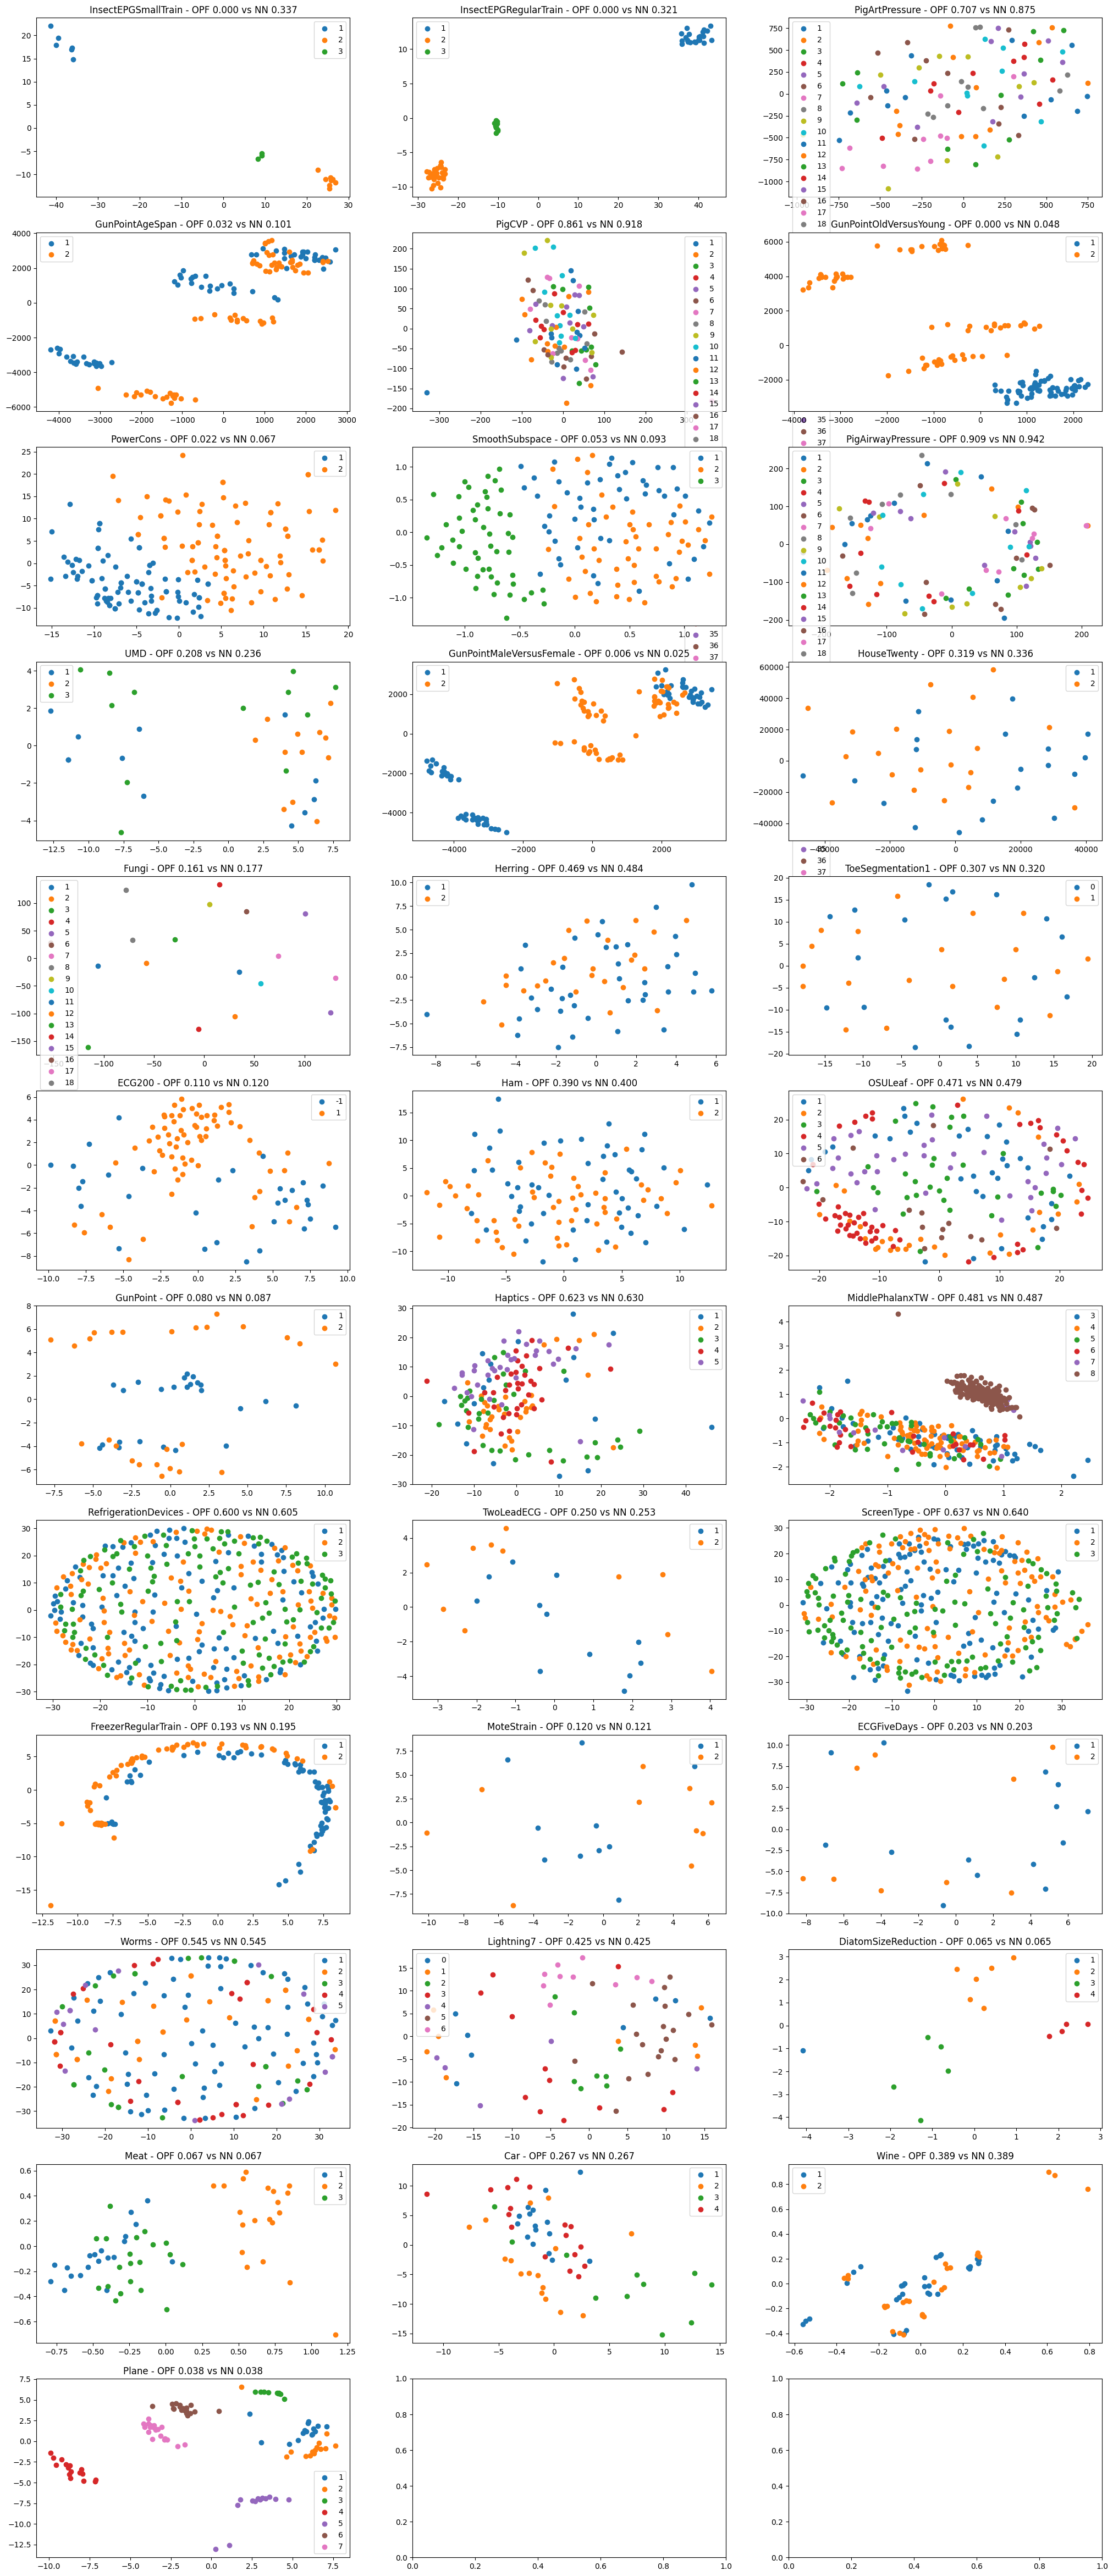

In [75]:
fig, axes = plt.subplots((len(df_best)+2)//3, 3, figsize=(25, 60))

def scatter_points(df_name, opf_error, nn_error, ax):
    df = pd.read_table(f'data/UCRArchive_2018/{df_name}/{df_name}_TRAIN.tsv', header=None)
    X, y = df.iloc[:, 1:], df.iloc[:, 0]
    embedding = MDS(n_components=2)
    X_t = embedding.fit_transform(X)

    for cur_y in np.unique(y):
        ax.scatter(X_t[y==cur_y,0], X_t[y==cur_y,1])
    ax.legend(np.unique(y))
    ax.title.set_text("%s - OPF %.3f vs NN %.3f" % (df_name, opf_error, nn_error))
    
for idx, df_info in enumerate(df_best):
    df_name, opf_error, nn_error = df_info
    scatter_points(df_name, opf_error, nn_error, axes.flatten()[idx])

plt.savefig('scatter.pdf')
plt.show()